The code below fetches all the matches where either Union, Club Brugge or Cercle Brugge are present.

In [1]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

# Database connection parameters
import psycopg2
import os

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

# Query to fetch match data
query = """
SELECT *
FROM matches
WHERE home_team_id IN ('1oyb7oym5nwzny8vxf03szd2h', '3ix9om1svhd6obl0mbk1otgop', 'ecj1gmc7pqcjo4sc9hvghj5u3')
   OR away_team_id IN ('1oyb7oym5nwzny8vxf03szd2h', '3ix9om1svhd6obl0mbk1otgop', 'ecj1gmc7pqcjo4sc9hvghj5u3')

"""
matches = pd.read_sql_query(query, conn)
matches.head()

C:\Users\Neo\AppData\Local\Temp\ipykernel_20304\2836686634.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  matches = pd.read_sql_query(query, conn)


,match_id,match_date,home_team_id,away_team_id,home_score,away_score
0,5oc8drrbruovbuiriyhdyiyok,2024-07-26,1oyb7oym5nwzny8vxf03szd2h,b7jmo07lqav0wfe2mtlzyspak,1,1
1,5ro450tmjg6o1r4cphzzyg74k,2024-07-28,2nhn3ikl1ciq34w3hcp883d6p,3ix9om1svhd6obl0mbk1otgop,3,0
2,5ow2wa823rjft38oh48b4ror8,2024-07-27,4dtif7outbuivua8umbwegoo5,ecj1gmc7pqcjo4sc9hvghj5u3,0,0
3,5u35bb21cuumrm2th8czyecr8,2024-08-04,3ix9om1svhd6obl0mbk1otgop,1uk609mhtsfhokhaewjapb26,1,2
4,5ugfsw7je1y0lay7xdqe3pces,2024-08-04,5z1b7fuvpqe6vnigvopomvecu,1oyb7oym5nwzny8vxf03szd2h,1,0


In [2]:
# Merged query to fetch event data with event type names
query = """
SELECT *
FROM matchevents me
WHERE me.match_id = '6aaebu7uj50ewu3irl3qmjg2c';
"""
events_df = pd.read_sql_query(query, conn)
events_df.head()

C:\Users\Neo\AppData\Local\Temp\ipykernel_20304\4108291896.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  events_df = pd.read_sql_query(query, conn)


,match_id,event_id,eventtype_id,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,x,y,end_coordinates_x,end_coordinates_y,receiver_player_id
0,6aaebu7uj50ewu3irl3qmjg2c,2724179145,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,INCOMPLETE,False,1,0 days 00:02:02.713000,NaT,alive,8y3iucyxguipljcmf87a11bk9,8y3iucyxguipljcmf87a11bk9,8kz0e83d3azssd7unbk2lqt0q,71.0,95.6,79.4,93.5,None
1,6aaebu7uj50ewu3irl3qmjg2c,2724179771,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,INCOMPLETE,False,1,0 days 00:02:41.123000,NaT,alive,1oyb7oym5nwzny8vxf03szd2h,1oyb7oym5nwzny8vxf03szd2h,x3g0yyxs0j4o8fxphxtf0st1,47.2,63.5,64.4,80.6,None
2,6aaebu7uj50ewu3irl3qmjg2c,2724178593,127294ef-9a42-4599-a128-e9b35d90bfbc,None,None,1,0 days 00:01:25.734000,NaT,alive,8y3iucyxguipljcmf87a11bk9,8y3iucyxguipljcmf87a11bk9,fs5utga62tud5s06xj27qdat,22.7,91.4,NaN,NaN,None
3,6aaebu7uj50ewu3irl3qmjg2c,2724178837,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,COMPLETE,True,1,0 days 00:01:34.773000,0 days 00:01:44.813000,alive,8y3iucyxguipljcmf87a11bk9,8y3iucyxguipljcmf87a11bk9,fs5utga62tud5s06xj27qdat,5.5,64.0,13.7,86.7,8kz0e83d3azssd7unbk2lqt0q
4,6aaebu7uj50ewu3irl3qmjg2c,2724178949,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,COMPLETE,True,1,0 days 00:01:44.813000,0 days 00:01:47.095000,alive,8y3iucyxguipljcmf87a11bk9,8y3iucyxguipljcmf87a11bk9,8kz0e83d3azssd7unbk2lqt0q,45.5,97.9,42.8,70.1,3zc219xqywme43v3jdwmv44d0


In [3]:
complex_query = """
WITH action_changes AS (
    SELECT
        a.*,
        LAG(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS prev_team_id,
        LEAD(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS next_team_id
    FROM
        spadl_actions a
    WHERE
        a.game_id = '6aaebu7uj50ewu3irl3qmjg2c'
),

possession_markers AS (
    SELECT
        *,
        CASE WHEN prev_team_id IS NULL OR team_id != prev_team_id THEN 1 ELSE 0 END AS is_new_possession
    FROM
        action_changes
),

possession_sequences AS (
    SELECT
        *,
        SUM(is_new_possession) OVER (ORDER BY period_id, seconds, id) AS possession_group
    FROM
        possession_markers
),

possession_stats AS (
    SELECT
        possession_group,
        team_id,
        COUNT(*) AS action_count,
        MAX(id) AS last_action_id
    FROM
        possession_sequences
    GROUP BY
        possession_group, team_id
)

-- Find possession-ending actions where team had 3+ consecutive actions
SELECT
    a.id AS action_id,
    a.game_id,
    a.period_id,
    a.seconds AS time_seconds,
    p.player_name,
    p.player_id,
    t.team_name AS team_losing_possession,
    nt.team_name AS team_gaining_possession,
    a.action_type AS type_name,
    a.result AS result_name,
    ps.action_count AS consecutive_team_actions,
    a.start_x,
    a.start_y,
    a.end_x,
    a.end_y,
    a.id AS original_event_id
FROM
    possession_sequences a
JOIN
    possession_stats ps ON a.possession_group = ps.possession_group 
                                            AND a.team_id = ps.team_id
                                            AND a.id = ps.last_action_id  
JOIN
    players p ON a.player_id = p.player_id
JOIN
    teams t ON a.team_id = t.team_id
LEFT JOIN
    teams nt ON a.next_team_id = nt.team_id
ORDER BY
    a.period_id,
    a.seconds,
    a.id;
"""

# Execute the complex query
possession_df = pd.read_sql_query(complex_query, conn)
print(f"Loaded {len(possession_df)} possession-ending actions")
display(possession_df.head())


C:\Users\Neo\AppData\Local\Temp\ipykernel_20304\2150430943.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  possession_df = pd.read_sql_query(complex_query, conn)


Loaded 354 possession-ending actions


,action_id,game_id,period_id,time_seconds,player_name,player_id,team_losing_possession,team_gaining_possession,type_name,result_name,consecutive_team_actions,start_x,start_y,end_x,end_y,original_event_id
0,226297,6aaebu7uj50ewu3irl3qmjg2c,1,2.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,0,0,3,68.25,36.040,36.960,0.000,226297
1,226312,6aaebu7uj50ewu3irl3qmjg2c,1,40.0,M. De Cuyper,bjhjz96omjukrg6tj3mny39t6,Club Brugge,Gent,0,1,15,16.38,64.328,45.570,55.216,226312
2,226313,6aaebu7uj50ewu3irl3qmjg2c,1,43.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,8,0,1,42.63,54.876,42.630,54.876,226313
3,226325,6aaebu7uj50ewu3irl3qmjg2c,1,82.0,H. Vetlesen,bybggxgpzlr7xz2f1i3b7c0kp,Club Brugge,Gent,0,0,12,59.43,3.264,84.210,8.704,226325
4,226326,6aaebu7uj50ewu3irl3qmjg2c,1,84.0,J. Torunarigha,fs5utga62tud5s06xj27qdat,Gent,Club Brugge,21,1,1,80.43,10.200,23.625,62.560,226326


In [4]:
# Convert time_seconds column to numeric if it's not already
possession_df['time_seconds'] = pd.to_numeric(possession_df['time_seconds'])

# Sort by period and time
possession_df = possession_df.sort_values(by=['period_id', 'time_seconds', 'action_id'])

# Compute the time difference to the next action
possession_df['next_action_time'] = possession_df['time_seconds'].shift(-1)
possession_df['time_diff'] = possession_df['next_action_time'] - possession_df['time_seconds']

# Filter out actions where the next action occurs within 5 seconds
filtered_df = possession_df[possession_df['time_diff'].isna() | (possession_df['time_diff'] > 5)]

# Drop auxiliary columns used for filtering
filtered_df = filtered_df.drop(columns=['next_action_time', 'time_diff'])

print(f"Filtered possession-ending actions: {len(filtered_df)} remaining")
display(filtered_df)


Filtered possession-ending actions: 200 remaining


,action_id,game_id,period_id,time_seconds,player_name,player_id,team_losing_possession,team_gaining_possession,type_name,result_name,consecutive_team_actions,start_x,start_y,end_x,end_y,original_event_id
0,226297,6aaebu7uj50ewu3irl3qmjg2c,1,2.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,0,0,3,68.250,36.040,36.960,0.000,226297
2,226313,6aaebu7uj50ewu3irl3qmjg2c,1,43.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,8,0,1,42.630,54.876,42.630,54.876,226313
4,226326,6aaebu7uj50ewu3irl3qmjg2c,1,84.0,J. Torunarigha,fs5utga62tud5s06xj27qdat,Gent,Club Brugge,21,1,1,80.430,10.200,23.625,62.560,226326
5,226330,6aaebu7uj50ewu3irl3qmjg2c,1,91.0,A. Skov Olsen,5asv6uc3a4xxsr9u30kdfc0ve,Club Brugge,Gent,0,0,4,100.800,18.564,95.235,31.756,226330
7,226342,6aaebu7uj50ewu3irl3qmjg2c,1,124.0,H. Vetlesen,bybggxgpzlr7xz2f1i3b7c0kp,Club Brugge,Gent,19,0,2,19.950,2.788,19.950,2.788,226342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,228092,6aaebu7uj50ewu3irl3qmjg2c,2,3120.0,M. Skóraś,jyh107tl6vv8bd1pgautj46h,Club Brugge,Gent,0,1,5,64.260,30.804,87.990,62.356,228092
348,228093,6aaebu7uj50ewu3irl3qmjg2c,2,3128.0,M. Samoise,7s4ws0u4erq1jfobqpsj0aoes,Gent,Club Brugge,9,1,1,100.905,47.260,100.905,47.260,228093
350,228101,6aaebu7uj50ewu3irl3qmjg2c,2,3150.0,P. Gerkens,5jywyphhwu9j4bphz0720kb9,Gent,Club Brugge,18,1,1,97.545,35.496,104.475,67.660,228101
352,228104,6aaebu7uj50ewu3irl3qmjg2c,2,3171.0,M. Samoise,7s4ws0u4erq1jfobqpsj0aoes,Gent,Club Brugge,18,1,2,85.890,43.996,61.215,46.376,228104


In [5]:
# Retry the big query with a different schema
complex_query = """ 
SELECT *
FROM (
    SELECT 
        me.*, 
        et.name,
        LAG(me.ball_owning_team) OVER (
            PARTITION BY me.match_id 
            ORDER BY me.period_id, me.timestamp
        ) AS prev_ball_owning_team
    FROM matchevents me
    INNER JOIN eventtypes et ON me.eventtype_id = et.eventtype_id
    WHERE me.match_id = '6aaebu7uj50ewu3irl3qmjg2c'
) subquery
WHERE ball_owning_team <> prev_ball_owning_team
ORDER BY period_id, timestamp;
"""
# Execute the complex query
possession2_df = pd.read_sql_query(complex_query, conn)
print(f"Loaded {len(possession2_df)} possession-ending actions")
# Remove all actions which have a new action within 5 seconds make sure you only check in the same period_id


# Try converting 'timestamp' to timedelta if it's in duration format
try:
    possession2_df['timestamp'] = pd.to_timedelta(possession2_df['timestamp'])
except Exception as e:
    print(f"Error converting timestamp: {e}")

# Sort by period_id and timestamp to ensure we have the events in chronological order
possession2_df = possession2_df.sort_values(by=['period_id', 'timestamp'])

# Add columns for the previous and next timestamps within the same period_id
possession2_df['prev_timestamp'] = possession2_df.groupby('period_id')['timestamp'].shift(1)
possession2_df['next_timestamp'] = possession2_df.groupby('period_id')['timestamp'].shift(-1)

# Filter out the actions that have another action within 5 seconds before or after it
mask = (
    ((possession2_df['timestamp'] - possession2_df['prev_timestamp']).abs().dt.total_seconds() > 5) & 
    ((possession2_df['next_timestamp'] - possession2_df['timestamp']).abs().dt.total_seconds() > 5)
)

# Apply the mask to filter the dataframe
filtered_possession2_df = possession2_df[mask]

print(f"Filtered down to {len(filtered_possession2_df)} possession-ending actions")


Loaded 237 possession-ending actions
Filtered down to 108 possession-ending actions


C:\Users\Neo\AppData\Local\Temp\ipykernel_20304\920438146.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  possession2_df = pd.read_sql_query(complex_query, conn)


In [6]:
# Now add the position of the ball during the different actions to the dataframe
gameid = '6aaebu7uj50ewu3irl3qmjg2c'
query = """ 
select *
from player_tracking
where player_id = 'ball' and game_id = %s
"""
ball_position_df = pd.read_sql_query(complex_query, conn)
print(f"Loaded {len(ball_position_df)} ball positions")
# Now we need to check in the filtered_df time_seconds column and the ball_position_df time_seconds column 
# and find the closest time_seconds in the ball_position_df to the time_seconds in the filtered_df the difference should be less than 2 seconds

print(ball_position_df.columns)

#check for every action in filtered_df is there is a direct match in ball_position_df, if so, add the ball position to the filtered_df (x,y)
filtered_df['ball_x'] = None
filtered_df['ball_y'] = None

for index, row in filtered_df.iterrows():
    # Find the closest ball position within 2 seconds
    closest_ball_position = ball_position_df[abs(ball_position_df['time_seconds'] - row['time_seconds']) <= 2]
    if not closest_ball_position.empty:
        # Get the first match (closest time)
        closest_row = closest_ball_position.iloc[0]
        # Use start_x, start_y or end_x, end_y as needed
        filtered_df.at[index, 'ball_x'] = closest_row['start_x']  # or 'end_x'
        filtered_df.at[index, 'ball_y'] = closest_row['start_y']  # or 'end_y'

display(filtered_df.head())
print(len(filtered_df))
# Now remove all the rows where Cercle Brugge is the team losing the possession
filtered_df = filtered_df[~filtered_df['team_losing_possession'].str.contains('Cercle Brugge')]
# Only show the first half of the game
filtered_df = filtered_df[filtered_df['period_id'] == 1]
print(len(filtered_df))


C:\Users\Neo\AppData\Local\Temp\ipykernel_20304\2111086643.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ball_position_df = pd.read_sql_query(complex_query, conn)


Loaded 237 ball positions
Index(['match_id', 'event_id', 'eventtype_id', 'result', 'success',
       'period_id', 'timestamp', 'end_timestamp', 'ball_state',
       'ball_owning_team', 'team_id', 'player_id', 'x', 'y',
       'end_coordinates_x', 'end_coordinates_y', 'receiver_player_id', 'name',
       'prev_ball_owning_team'],
      dtype='object')


KeyError: 'time_seconds'

In [ ]:
# Get all the player tracking data for "gameid"
query = """
select *
from player_tracking
where game_id = %s
"""
player_tracking_df = pd.read_sql_query(query, conn, params=(gameid,))
print(f"Loaded {len(player_tracking_df)} player tracking data")
# Add the time_seconds column to the player_tracking_df based on the timestamp
# Convert timestamp to timedelta
player_tracking_df['timestamp'] = pd.to_timedelta(player_tracking_df['timestamp'])

# Extract total seconds
player_tracking_df['time_seconds'] = player_tracking_df['timestamp'].dt.total_seconds()

display(player_tracking_df.head())




Loaded 138851 player tracking data


,id,game_id,frame_id,timestamp,period_id,player_id,x,y,time_seconds
0,7407205,6aaebu7uj50ewu3irl3qmjg2c,1727012147000,0 days 00:05:47,1,7eox5w91a19w4kx2u3cc8d4yy,57.534426,21.142818,347.0
1,7407206,6aaebu7uj50ewu3irl3qmjg2c,1727012147000,0 days 00:05:47,1,bybggxgpzlr7xz2f1i3b7c0kp,79.852438,27.738245,347.0
2,7407207,6aaebu7uj50ewu3irl3qmjg2c,1727012147000,0 days 00:05:47,1,15odj8wui8136996wi2d5t7md,74.458879,35.529727,347.0
3,7407208,6aaebu7uj50ewu3irl3qmjg2c,1727012147000,0 days 00:05:47,1,be0ws51ws5cm9wzmcp3ozmklx,94.878073,44.104945,347.0
4,7407209,6aaebu7uj50ewu3irl3qmjg2c,1727012148000,0 days 00:05:48,1,ball,79.953973,27.579818,348.0


In [ ]:
#Only keep the first 5 rows of the filtered_df dataframe
filtered_df = filtered_df.head(1)
display(filtered_df)


,action_id,game_id,period_id,time_seconds,player_name,player_id,team_losing_possession,team_gaining_possession,type_name,result_name,consecutive_team_actions,start_x,start_y,end_x,end_y,original_event_id,ball_x,ball_y
0,226297,6aaebu7uj50ewu3irl3qmjg2c,1,2.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,0,0,3,68.25,36.04,36.96,0.0,226297,68.25,36.04


In [ ]:
# Get all the ball positions for the match
query = """ 
select *
from player_tracking
where player_id = 'ball' and game_id = %s
order by frame_id, timestamp
"""
ball_position_df = pd.read_sql_query(query, conn, params=(gameid,))
#Add an extra column time_seconds to the ball_position_df based on the timestamp
ball_position_df['timestamp'] = pd.to_timedelta(ball_position_df['timestamp'])
# Extract total seconds
ball_position_df['time_seconds'] = ball_position_df['timestamp'].dt.total_seconds()
print(f"Loaded {len(ball_position_df)} ball positions")
display(ball_position_df.head())

Loaded 6037 ball positions


,id,game_id,frame_id,timestamp,period_id,player_id,x,y,time_seconds
0,7399205,6aaebu7uj50ewu3irl3qmjg2c,1727011800000,0 days 00:00:00,1,ball,50.245902,50.222951,0.0
1,7399228,6aaebu7uj50ewu3irl3qmjg2c,1727011801000,0 days 00:00:01,1,ball,64.434138,51.796721,1.0
2,7399251,6aaebu7uj50ewu3irl3qmjg2c,1727011802000,0 days 00:00:02,1,ball,65.419741,52.622951,2.0
3,7399274,6aaebu7uj50ewu3irl3qmjg2c,1727011803000,0 days 00:00:03,1,ball,62.906897,50.734426,3.0
4,7399297,6aaebu7uj50ewu3irl3qmjg2c,1727011804000,0 days 00:00:04,1,ball,52.104918,31.319273,4.0


Now plot all these actions on the field.

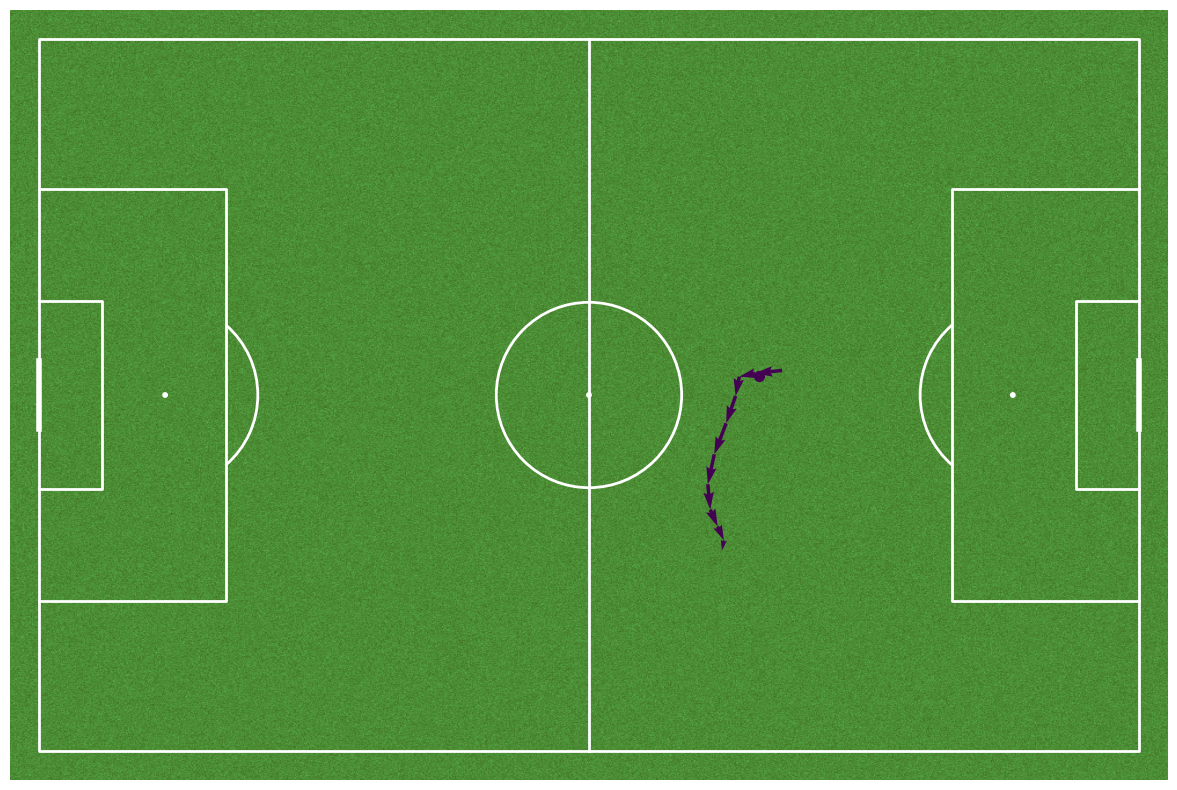

,id,game_id,frame_id,timestamp,period_id,player_id,x,y,time_seconds
140,7399257,6aaebu7uj50ewu3irl3qmjg2c,1727011802000,0 days 00:00:02,1,32sds4yk7ch30mng0gyzhdk9h,67.540121,53.438689,2.0
163,7399280,6aaebu7uj50ewu3irl3qmjg2c,1727011803000,0 days 00:00:03,1,32sds4yk7ch30mng0gyzhdk9h,65.083216,53.055738,3.0
186,7399303,6aaebu7uj50ewu3irl3qmjg2c,1727011804000,0 days 00:00:04,1,32sds4yk7ch30mng0gyzhdk9h,63.647431,52.565246,4.0
209,7399326,6aaebu7uj50ewu3irl3qmjg2c,1727011805000,0 days 00:00:05,1,32sds4yk7ch30mng0gyzhdk9h,63.317121,49.862295,5.0
232,7399349,6aaebu7uj50ewu3irl3qmjg2c,1727011806000,0 days 00:00:06,1,32sds4yk7ch30mng0gyzhdk9h,62.459379,46.020984,6.0
255,7399372,6aaebu7uj50ewu3irl3qmjg2c,1727011807000,0 days 00:00:07,1,32sds4yk7ch30mng0gyzhdk9h,61.380543,41.673527,7.0
278,7399395,6aaebu7uj50ewu3irl3qmjg2c,1727011808000,0 days 00:00:08,1,32sds4yk7ch30mng0gyzhdk9h,60.794509,37.476582,8.0
301,7399418,6aaebu7uj50ewu3irl3qmjg2c,1727011809000,0 days 00:00:09,1,32sds4yk7ch30mng0gyzhdk9h,61.019155,33.918336,9.0
324,7399441,6aaebu7uj50ewu3irl3qmjg2c,1727011810000,0 days 00:00:10,1,32sds4yk7ch30mng0gyzhdk9h,61.689543,31.569045,10.0
347,7399464,6aaebu7uj50ewu3irl3qmjg2c,1727011811000,0 days 00:00:11,1,32sds4yk7ch30mng0gyzhdk9h,62.252491,29.609400,11.0


,action_id,game_id,period_id,time_seconds,player_name,player_id,team_losing_possession,team_gaining_possession,type_name,result_name,consecutive_team_actions,start_x,start_y,end_x,end_y,original_event_id,ball_x,ball_y
0,226297,6aaebu7uj50ewu3irl3qmjg2c,1,2.0,S. Mitrović,32sds4yk7ch30mng0gyzhdk9h,Gent,Club Brugge,0,0,3,68.25,36.04,36.96,0.0,226297,68.25,36.04


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set up the pitch
pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta')  
fig, ax = pitch.draw(figsize=(12, 8))

# Generate unique colors for each ball position
num_actions = len(filtered_df)
colors = cm.viridis(np.linspace(0, 1, num_actions))  # Get unique colors from the colormap

for i, (_, row) in enumerate(filtered_df.iterrows()):
    # Assign color
    color = colors[i]

    # The ball position using the ball_position_df based on time_seconds and period_id equal to the row
    ball_x = ball_position_df[(ball_position_df['time_seconds'] == row['time_seconds']) &
                (ball_position_df['period_id'] == row['period_id'])]['x'].values[0]  
    ball_y =  ball_position_df[(ball_position_df['time_seconds'] == row['time_seconds']) &
                (ball_position_df['period_id'] == row['period_id'])]['y'].values[0]  

    # Plot ball position
    ax.scatter(ball_x, ball_y, color=color, s=50, zorder=5)  

    # Get player data for the next 10 seconds
    player_id = row['player_id']
    action_time = row['time_seconds']
    
    player_data = player_tracking_df[(player_tracking_df['player_id'] == player_id) & 
                                     (player_tracking_df['time_seconds'] >= action_time) & 
                                     (player_tracking_df['time_seconds'] <= action_time + 10) &
                                     (player_tracking_df['period_id'] == row['period_id'])]
    
    # Ensure there are at least two points to plot vectors
    if len(player_data) > 1:
        # Extract positions
        x_positions = player_data['x'].values
        y_positions = player_data['y'].values
        # Compute direction vectors (differences between consecutive positions)
        dx = np.diff(x_positions)
        dy = np.diff(y_positions)

        # Use quiver to plot vectors
        ax.quiver(x_positions[:-1], y_positions[:-1], dx, dy, angles='xy', scale_units='xy', 
                  scale=1, color=color, zorder=4, width=0.003)

# Show the plot
plt.show()
display(player_data)
display(filtered_df)